In [ ]:
%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt   

import seaborn as sns


from sklearn.model_selection import train_test_split

import numpy as np


from sklearn import metrics

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Predictive_modeling_project/Car_Crash (1) (1).csv",index_col=0)

In [ ]:
df1.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
7,10-24,13.374,Not_Survived,airbag,belted,1,m,37,1997,1995,deploy,driver,1,4.0,0.238912037
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01


In [ ]:
df1.shape

(11217, 15)

In [ ]:
df2 = df1.drop('caseid', axis=1)

In [ ]:
df2

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0
7,10-24,13.374,Not_Survived,airbag,belted,1,m,37,1997,1995,deploy,driver,1,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11200,25-39,225.957,survived,airbag,none,0,m,28,2002,2001,nodeploy,driver,0,1.0
11211,25-39,261.217,survived,airbag,belted,0,f,45,2002,1997,nodeploy,driver,0,2.0
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0


In [ ]:
df2.shape

(11217, 14)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


In [ ]:
df2.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
dtype: int64

In [ ]:
df3=df2.dropna(axis='rows')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11140 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11140 non-null  object 
 1   weight       11140 non-null  float64
 2   Survived     11140 non-null  object 
 3   airbag       11140 non-null  object 
 4   seatbelt     11140 non-null  object 
 5   frontal      11140 non-null  int64  
 6   sex          11140 non-null  object 
 7   ageOFocc     11140 non-null  int64  
 8   yearacc      11140 non-null  int64  
 9   yearVeh      11140 non-null  int64  
 10  abcat        11140 non-null  object 
 11  occRole      11140 non-null  object 
 12  deploy       11140 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


In [ ]:
df3.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [ ]:

df3['Survived'].value_counts()


survived        9960
Not_Survived    1180
Name: Survived, dtype: int64

In [ ]:
df3.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000
mean,431.071396,0.643806,37.436984,2001.101167,1994.172531,0.389677,1.825583
std,1410.173474,0.478895,18.170396,1.058695,5.658508,0.487699,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.120000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.042000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,322.273000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [ ]:

df3.dvcat.unique()


array(['55+', '10-24', '40-54', '1-9km/h', '25-39'], dtype=object)

In [ ]:

df3["dvcat"].replace({'1-9km/h':'1','10-24':'2','25-39':'3','40-54':'4','55+':'5'}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.dvcat.unique()

array(['5', '2', '4', '1', '3'], dtype=object)

In [ ]:
df3.Survived.unique()

array(['Not_Survived', 'survived'], dtype=object)

In [ ]:
df3["Survived"].replace({'Not_Survived':'1','survived':'0'}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.Survived.unique()

array(['1', '0'], dtype=object)

In [ ]:
df3.airbag.unique()

array(['none', 'airbag'], dtype=object)

In [ ]:
df3["airbag"].replace({'airbag':'1','none':'0'}, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.airbag.unique()

array(['0', '1'], dtype=object)

In [ ]:
df3.seatbelt.unique()

array(['none', 'belted'], dtype=object)

In [ ]:
df3["seatbelt"].replace({'belted':'1','none':'0'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.seatbelt.unique()

array(['0', '1'], dtype=object)

In [ ]:
df3.sex.unique()

array(['m', 'f'], dtype=object)

In [ ]:
df3["sex"].replace({'m':'1','f':'0'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.sex.unique()

array(['1', '0'], dtype=object)

In [ ]:
df3.abcat.unique()

array(['unavail', 'deploy', 'nodeploy'], dtype=object)

In [ ]:
df3["abcat"].replace({'unavail':'1','deploy':'2','nodeploy':'3'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.abcat.unique()

array(['1', '2', '3'], dtype=object)

In [ ]:
df3.occRole.unique()

array(['driver', 'pass'], dtype=object)

In [ ]:
df3["occRole"].replace({'driver':'1','pass':'0'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3.occRole.unique()

array(['1', '0'], dtype=object)

In [ ]:
df3.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
dtype: object

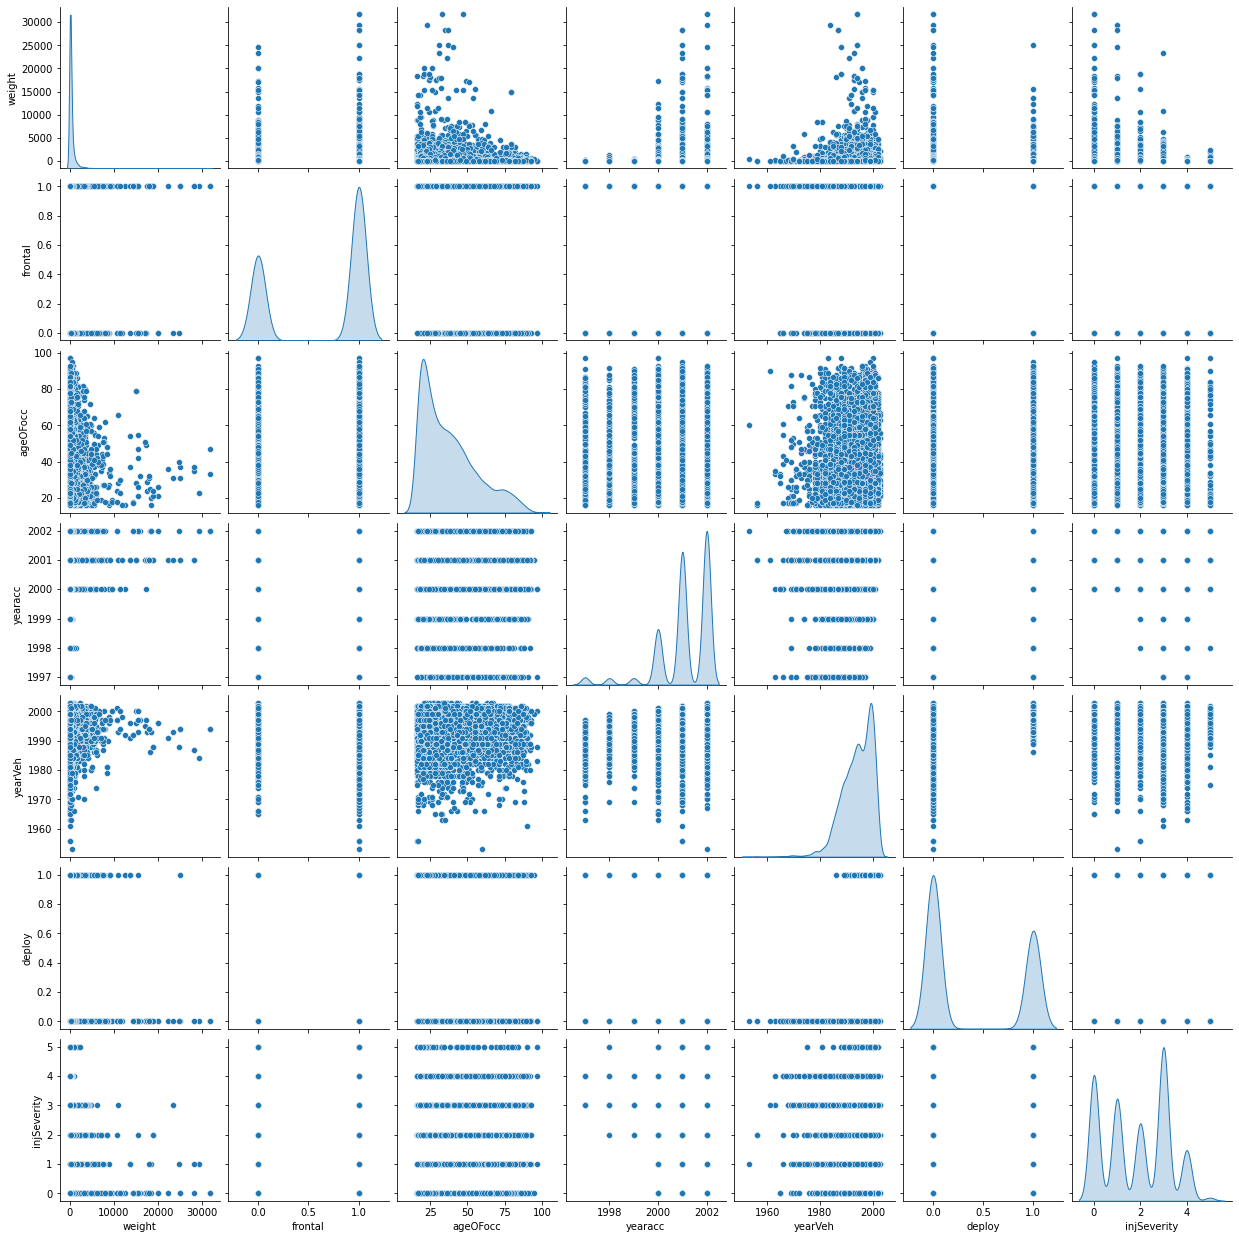

In [ ]:
sns.pairplot(df3, diag_kind = 'kde')

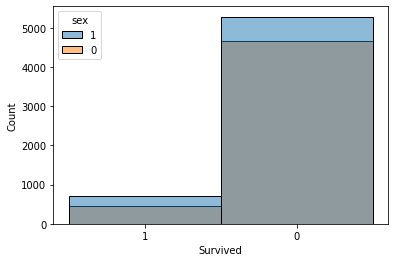

In [ ]:
sns.histplot(x='Survived',data=df3,hue=df3['sex']) 

In [ ]:
sns.distplot(df3["sepal length"],color='darkorange') 

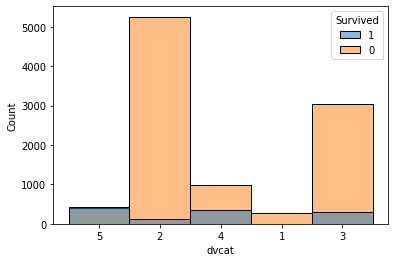

In [ ]:
sns.histplot(x='dvcat',data=df3,hue=df3['Survived']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


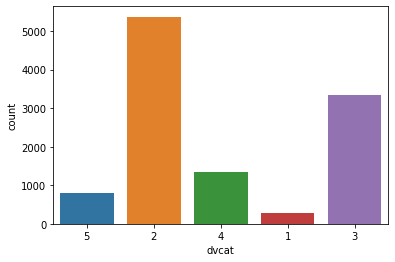

In [ ]:
sns.countplot(df3['dvcat']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


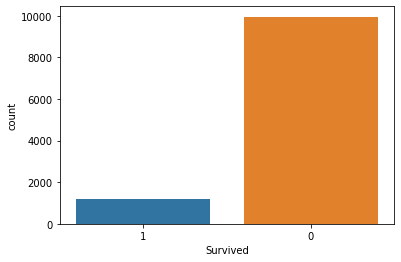

In [ ]:
sns.countplot(df3['Survived']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


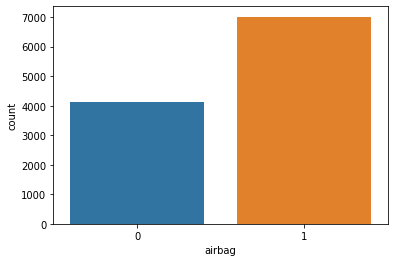

In [ ]:
sns.countplot(df3['airbag'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


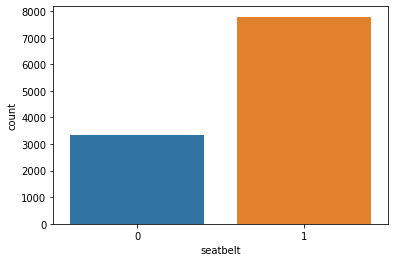

In [ ]:
sns.countplot(df3['seatbelt'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


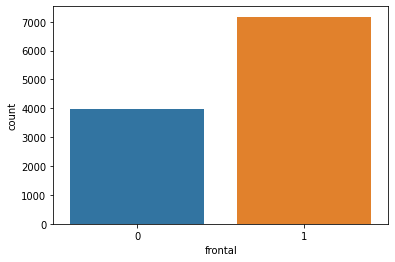

In [ ]:
sns.countplot(df3['frontal'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


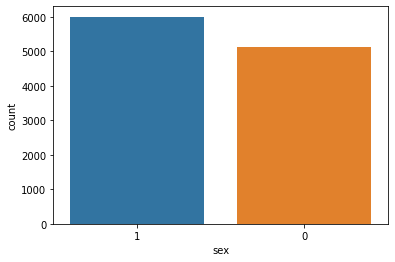

In [ ]:
sns.countplot(df3['sex'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


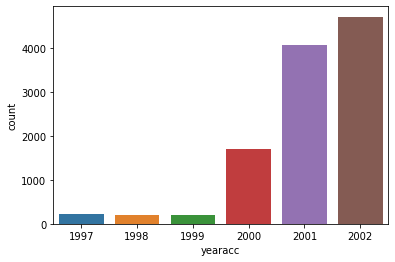

In [ ]:
sns.countplot(df3['yearacc'])


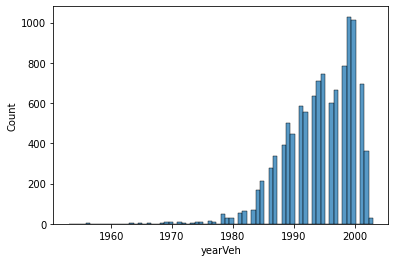

In [ ]:

sns.histplot(x='yearVeh',data=df3) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


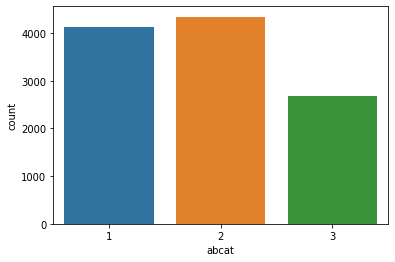

In [ ]:
sns.countplot(df3['abcat'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


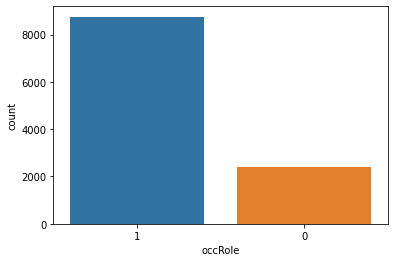

In [ ]:
sns.countplot(df3['occRole'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


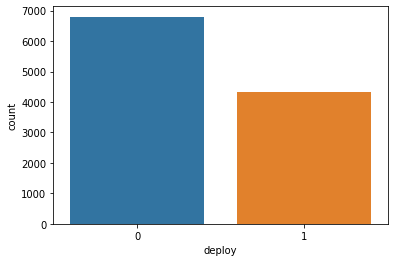

In [ ]:
sns.countplot(df3['deploy'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


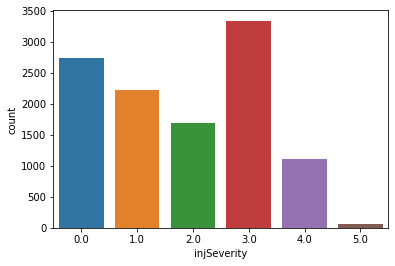

In [ ]:
sns.countplot(df3['injSeverity'])


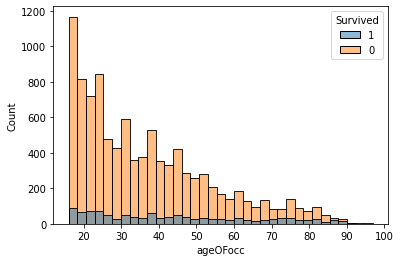

In [ ]:

sns.histplot(x='ageOFocc',data=df3,hue=df3['Survived']) 

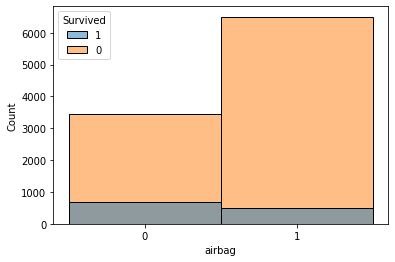

In [ ]:

sns.histplot(x='airbag',data=df3,hue=df3['Survived']) 


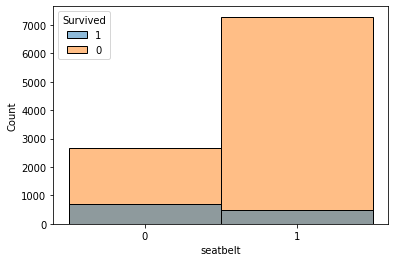

In [ ]:
sns.histplot(x='seatbelt',data=df3,hue=df3['Survived']) 


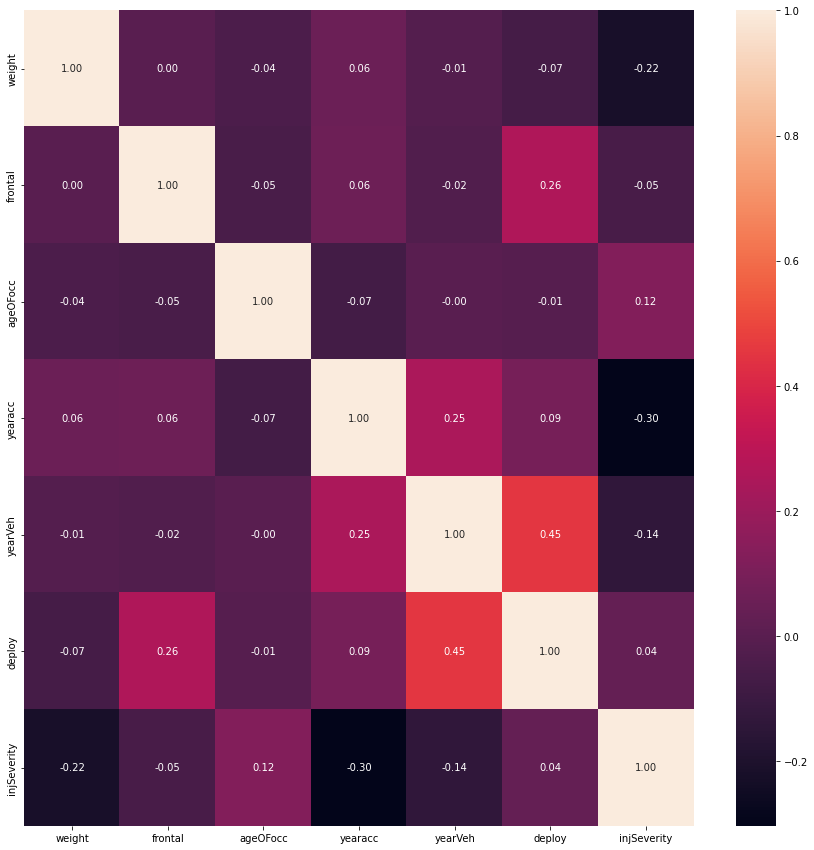

In [ ]:

plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(),annot=True,fmt=".2f");

In [ ]:
df3.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000,11140.000000
mean,431.071396,0.643806,37.436984,2001.101167,1994.172531,0.389677,1.825583
std,1410.173474,0.478895,18.170396,1.058695,5.658508,0.487699,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.120000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.042000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,322.273000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [ ]:
df3.groupby(["Survived"]).count()

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
Survived,,,,,,,,,,,,,
0,9960,9960,9960,9960,9960,9960,9960,9960,9960,9960,9960,9960,9960
1,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180


In [ ]:
X=df3.drop(['Survived'],axis=1)
Y=df3['Survived']

In [ ]:
test_size = 0.30 
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9874326750448833
[[2968   18]
 [  24  332]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2986
           1       0.95      0.93      0.94       356

    accuracy                           0.99      3342
   macro avg       0.97      0.96      0.97      3342
weighted avg       0.99      0.99      0.99      3342



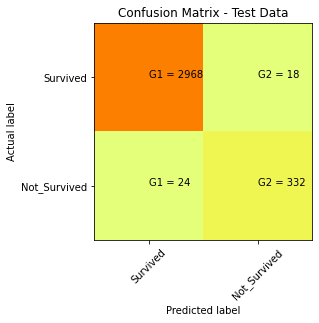

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Survived', 'Not_Survived']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()